In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



base_dir = os.path.normpath("G:/.shortcut-targets-by-id/0B3ejcGO9fA5eYXlHMW9tekVERmc/JB labs documents/Updated_JB_documents_2019/JB LAB_Projects/biofilm_qtl/data/platereader")

#G:\.shortcut-targets-by-id\0B3ejcGO9fA5eYXlHMW9tekVERmc\JB labs documents\Updated_JB_documents_2019\JB LAB_Projects\biofilm_qtl\data\platereader
#20250604_jb22_srb11_mus7_rpl12

In [10]:
fname_base = '20250604_jb22_srb11_mus7_rpl12'
skiprows_param = 10

od_data = pd.read_csv(base_dir + os.sep + fname_base + '.csv', skiprows=skiprows_param, index_col=0)
od_data = od_data.drop(columns = ['Time'])
times_raw = list(od_data.columns)

times = []
for time in times_raw:
    timesp = time.split(' h ')
    hour = int(timesp[0])
    if timesp[1]=='': 
        min = 0
    else: 
        min = int(timesp[1].split(' min')[0])
    times.append(float(hour + min/60))

In [8]:
#Plot entire 96 well plate: 

fig, axarr = plt.subplots(8,12, figsize = (120,80), sharey=True, sharex = True)
for jj, row in enumerate('ABCDEFGH'):
    for kk, col in enumerate(range(1,13)): 
        ax = axarr[jj,kk]
        well = row + str(col).zfill(2)
        ax.plot(times, od_data.loc[well,:])
        ax.set_ylim(0,1.25)
        if col==1: 
            ax.set_ylabel(row)
        if row=='H': 
            ax.set_xlabel(str(col))

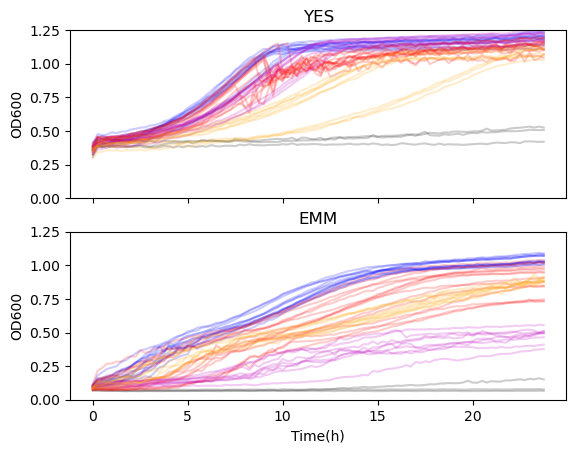

In [18]:
sample_map = pd.read_csv(base_dir + os.sep + '/' + fname_base + '_sample_map.csv')

fig, axarr = plt.subplots(2,1, sharex=True)

colormap = {'JB22': 'b', 
            'control': 'k',
            'srb11del': 'r', 
            'rpl12del': 'm',
            'mus7del': 'orange' 
            }

for jj, media in enumerate(['YES','EMM']): 
    ax = axarr[jj]
    ax.set_title(media)
    if jj==1: 
        ax.set_xlabel('Time(h)')
    ax.set_ylabel('OD600')
    ax.set_ylim([0, 1.25])
    for strain in colormap.keys():
        sample_map_media_strain = sample_map[(sample_map['Media']==media) & (sample_map['Strain']==strain)]
        for row, col in zip(sample_map_media_strain['Row'], sample_map_media_strain['Column']):
            well = row + str(col).zfill(2)
            ax.plot(times, od_data.loc[well,:], c = colormap[strain], alpha = 0.2, label = strain)

A02
C06
E10
A04
C08
E12


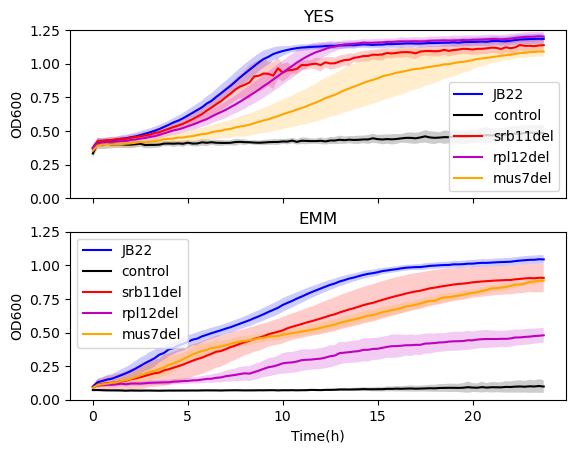

In [35]:
#Plot mean curves
fig, axarr = plt.subplots(2,1, sharex=True)

colormap = {'JB22': 'b', 
            'control': 'k',
            'srb11del': 'r', 
            'rpl12del': 'm',
            'mus7del': 'orange' 
            }

for jj, media in enumerate(['YES','EMM']): 
    ax = axarr[jj]
    ax.set_title(media)
    if jj==1: 
        ax.set_xlabel('Time(h)')
    ax.set_ylabel('OD600')
    ax.set_ylim([0, 1.25])

    well_lists = dict(zip(colormap.keys(), [[] for jj in range(len(colormap.keys()))]))  #List to store well names for various conditions

    for strain in colormap.keys():
        sample_map_media_strain = sample_map[(sample_map['Media']==media) & (sample_map['Strain']==strain)]
        for row, col in zip(sample_map_media_strain['Row'], sample_map_media_strain['Column']):
            well = row + str(col).zfill(2)
            if strain=='control':
                print(well)
            well_lists[strain].append(well)      
            
    
        mean = od_data.loc[well_lists[strain],:].mean()
        std = od_data.loc[well_lists[strain],:].std()
        ax.plot(times, mean, c = colormap[strain], label = strain)
        ax.fill_between(times, mean - std, mean + std, facecolor=colormap[strain], alpha=0.2)
    ax.legend()

    



# #plot edge vs middle
# fig, axarr = plt.subplots(2,1, sharex=True)

# colormap = {'JB22': 'r', 
#             'JB22_edge': 'grey',
#             'Control': 'b', 
#             'Control_edge': 'k'
#             }

# for jj, media in enumerate(['YES','EMM']): 
#     ax = axarr[jj]
#     ax.set_title(media)
#     if jj==1: 
#         ax.set_xlabel('Time(h)')
#     ax.set_ylabel('OD600')
#     ax.set_ylim([0, 1.25])

#     well_lists = {'JB22': [], 
#             'JB22_edge': [],
#             'Control': [], 
#             'Control_edge': []
#             }

#     for strain in ['JB22', 'Control']:  
#         sample_map_media_strain = sample_map[(sample_map['Media']==media) & (sample_map['Strain']==strain)]
        
#         for row, col in zip(sample_map_media_strain['Row'], sample_map_media_strain['Column']):  # Extract wells 
#             if (row in {'A','H'}) | (col in {1,12}):  # Edge well
#                 well = row + str(col).zfill(2)          
#                 well_lists[strain + '_edge'].append(well)
                
#             else: 
#                 well = row + str(col).zfill(2)          
#                 well_lists[strain].append(well)
#                 #ax.plot(times, od_data.loc[well,:], c = colormap[strain], alpha = 0.2)
    
        
#         for edge in {'', '_edge'}: 
#             mean = od_data.loc[well_lists[strain + edge],:].mean()
#             std = od_data.loc[well_lists[strain + edge],:].std()
#             ax.plot(times, mean, c = colormap[strain + edge], label = strain + edge)
#             ax.fill_between(times, mean - std, mean + std, facecolor=colormap[strain + edge], alpha=0.2)
#         ax.legend()


In [5]:
fname_base = '20250618_jb22_srb10_kgd2_tlg2_overnight_35c'
skiprows_param = 6

od_data = pd.read_csv(base_dir + os.sep + fname_base + '.csv', skiprows=skiprows_param, index_col=0)
od_data = od_data.drop(columns = ['Time'])
times_raw = list(od_data.columns)

times = []
for time in times_raw:
    timesp = time.split(' h ')
    hour = int(timesp[0])
    if timesp[1]=='': 
        min = 0
    else: 
        min = int(timesp[1].split(' min')[0])
    times.append(float(hour + min/60))

In [6]:
#Plot entire 96 well plate: 

fig, axarr = plt.subplots(8,12, figsize = (120,80), sharey=True, sharex = True)
for jj, row in enumerate('ABCDEFGH'):
    for kk, col in enumerate(range(1,13)): 
        ax = axarr[jj,kk]
        well = row + str(col).zfill(2)
        ax.plot(times, od_data.loc[well,:])
        ax.set_ylim(0,1.25)
        if col==1: 
            ax.set_ylabel(row)
        if row=='H': 
            ax.set_xlabel(str(col))

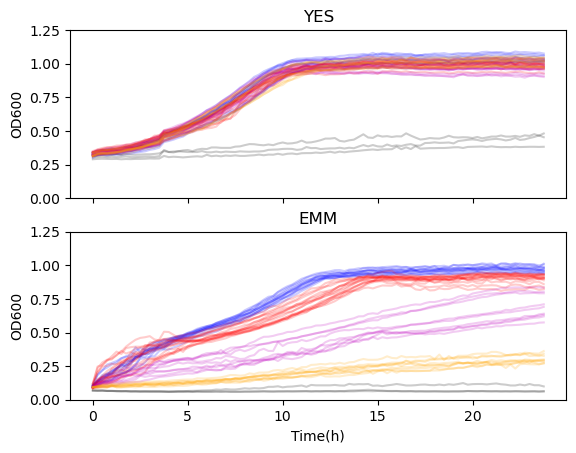

In [7]:
sample_map = pd.read_csv(base_dir + os.sep + '/' + fname_base + '_sample_map.csv')

fig, axarr = plt.subplots(2,1, sharex=True)

colormap = {'JB22': 'b', 
            'control': 'k',
            'srb10del': 'r', 
            'kgd2del': 'm',
            'tlg2del': 'orange' 
            }

for jj, media in enumerate(['YES','EMM']): 
    ax = axarr[jj]
    ax.set_title(media)
    if jj==1: 
        ax.set_xlabel('Time(h)')
    ax.set_ylabel('OD600')
    ax.set_ylim([0, 1.25])
    for strain in colormap.keys():
        sample_map_media_strain = sample_map[(sample_map['Media']==media) & (sample_map['Strain']==strain)]
        for row, col in zip(sample_map_media_strain['Row'], sample_map_media_strain['Column']):
            well = row + str(col).zfill(2)
            ax.plot(times, od_data.loc[well,:], c = colormap[strain], alpha = 0.2, label = strain)

A02
C06
E10
A04
C08
E12


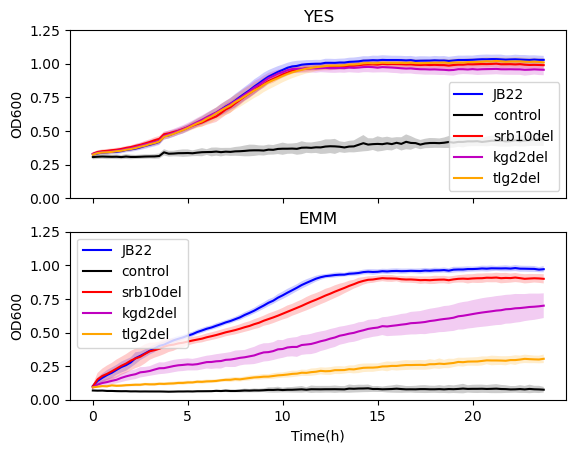

In [8]:
#Plot mean curves
fig, axarr = plt.subplots(2,1, sharex=True)

colormap = {'JB22': 'b', 
            'control': 'k',
            'srb10del': 'r', 
            'kgd2del': 'm',
            'tlg2del': 'orange' 
            }

for jj, media in enumerate(['YES','EMM']): 
    ax = axarr[jj]
    ax.set_title(media)
    if jj==1: 
        ax.set_xlabel('Time(h)')
    ax.set_ylabel('OD600')
    ax.set_ylim([0, 1.25])

    well_lists = dict(zip(colormap.keys(), [[] for jj in range(len(colormap.keys()))]))  #List to store well names for various conditions

    for strain in colormap.keys():
        sample_map_media_strain = sample_map[(sample_map['Media']==media) & (sample_map['Strain']==strain)]
        for row, col in zip(sample_map_media_strain['Row'], sample_map_media_strain['Column']):
            well = row + str(col).zfill(2)
            if strain=='control':
                print(well)
            well_lists[strain].append(well)      
            
    
        mean = od_data.loc[well_lists[strain],:].mean()
        std = od_data.loc[well_lists[strain],:].std()
        ax.plot(times, mean, c = colormap[strain], label = strain)
        ax.fill_between(times, mean - std, mean + std, facecolor=colormap[strain], alpha=0.2)
    ax.legend()

    



# #plot edge vs middle
# fig, axarr = plt.subplots(2,1, sharex=True)

# colormap = {'JB22': 'r', 
#             'JB22_edge': 'grey',
#             'Control': 'b', 
#             'Control_edge': 'k'
#             }

# for jj, media in enumerate(['YES','EMM']): 
#     ax = axarr[jj]
#     ax.set_title(media)
#     if jj==1: 
#         ax.set_xlabel('Time(h)')
#     ax.set_ylabel('OD600')
#     ax.set_ylim([0, 1.25])

#     well_lists = {'JB22': [], 
#             'JB22_edge': [],
#             'Control': [], 
#             'Control_edge': []
#             }

#     for strain in ['JB22', 'Control']:  
#         sample_map_media_strain = sample_map[(sample_map['Media']==media) & (sample_map['Strain']==strain)]
        
#         for row, col in zip(sample_map_media_strain['Row'], sample_map_media_strain['Column']):  # Extract wells 
#             if (row in {'A','H'}) | (col in {1,12}):  # Edge well
#                 well = row + str(col).zfill(2)          
#                 well_lists[strain + '_edge'].append(well)
                
#             else: 
#                 well = row + str(col).zfill(2)          
#                 well_lists[strain].append(well)
#                 #ax.plot(times, od_data.loc[well,:], c = colormap[strain], alpha = 0.2)
    
        
#         for edge in {'', '_edge'}: 
#             mean = od_data.loc[well_lists[strain + edge],:].mean()
#             std = od_data.loc[well_lists[strain + edge],:].std()
#             ax.plot(times, mean, c = colormap[strain + edge], label = strain + edge)
#             ax.fill_between(times, mean - std, mean + std, facecolor=colormap[strain + edge], alpha=0.2)
#         ax.legend()


In [ ]:
## 8 July Experiment

In [50]:
## 17 July Experiment

fname_base = '20250716_jb22_srb10_kgd2_tlg2'
skiprows_param = 9

#For these data downloaded temperature and humidity

od_data = pd.read_csv(base_dir + os.sep + fname_base + '.csv', skiprows=skiprows_param, index_col=0)
od_data = od_data.drop(columns = ['Content'])


#Identify which columns are Raw Data, Humidity, and Temperature
od_data.columns

raw_data_cols = []
humidity_cols = []
temp_cols = []

for jj, column in enumerate(od_data.columns):
    if "Raw Data" in column:
        raw_data_cols.append(jj)
    if "Humidity" in column:
        humidity_cols.append(jj)
    if "Temperature" in column: 
        temp_cols.append(jj)

raw_data = od_data.iloc[1:,raw_data_cols]
raw_data = raw_data.astype('float')

#Assume temperature and humidity have only one value - using the first row for that value
temps = list(od_data.iloc[1,temp_cols].astype('float'))
humidity = list(od_data.iloc[1,humidity_cols].astype('float'))

times_raw = list(od_data.iloc[0,0:len(raw_data_cols)])

times = []
for time in times_raw:
    timesp = time.split(' h ')
    hour = int(timesp[0])
    if timesp[1]=='': 
        min = 0
    else: 
        min = int(timesp[1].split(' min')[0])
    times.append(float(hour + min/60))

In [49]:
raw_data.astype('float')

Raw Data  (600)  Raw Data  (600).1  Raw Data  (600).2  \
Well                                                          
A01             0.577              0.549              0.549   
A02             0.489              0.488              0.483   
A03             0.165              0.298              0.316   
A04             0.102              0.105              0.105   
A05             0.485              0.483              0.479   
...               ...                ...                ...   
H08             0.146              0.235              0.260   
H09             0.505              0.499              0.501   
H10             0.496              0.502              0.502   
H11             0.154              0.250              0.282   
H12             0.141              0.201              0.220   

      Raw Data  (600).3  Raw Data  (600).4  Raw Data  (600).5  \
Well                                                            
A01               0.551              0.557              0.560   
A02               0.477              0.475              0.474   
A03               0.350              0.373              0.412   
A04               0.106              0.106              0.104   
A05               0.477              0.480              0.476   
...                 ...                ...                ...   
H08               0.296              0.328              0.327   
H09               0.507              0.507              0.508   
H10               0.500              0.502              0.499   
H11               0.294              0.302              0.308   
H12               0.225              0.234              0.249   

      Raw Data  (600).6  Raw Data  (600).7  Raw Data  (600).8  \
Well                                                            
A01               0.565              0.573              0.576   
A02               0.472              0.470              0.467   
A03               0.412              0.430              0.428   
A04               0.106              0.104              0.105   
A05               0.479              0.478              0.479   
...                 ...                ...                ...   
H08               0.353              0.410              0.455   
H09               0.509              0.512              0.513   
H10               0.503              0.501              0.505   
H11               0.319              0.309              0.338   
H12               0.255              0.250              0.260   

      Raw Data  (600).9  ...  Raw Data  (600).86  Raw Data  (600).87  \
Well                     ...                                           
A01               0.587  ...               1.194               1.196   
A02               0.469  ...               0.467               0.472   
A03               0.446  ...               1.064               1.070   
A04               0.105  ...               0.103               0.103   
A05               0.481  ...               1.085               1.101   
...                 ...  ...                 ...                 ...   
H08               0.449  ...               1.077               1.087   
H09               0.521  ...               1.185               1.195   
H10               0.505  ...               1.089               1.101   
H11               0.319  ...               0.494               0.493   
H12               0.252  ...               0.520               0.532   

      Raw Data  (600).88  Raw Data  (600).89  Raw Data  (600).90  \
Well                                                               
A01                1.195               1.199               1.195   
A02                0.465               0.468               0.468   
A03                1.070               1.068               1.071   
A04                0.103               0.101               0.102   
A05                1.103               1.099               1.107   
...                  ...                 ...                 ...   
H08          

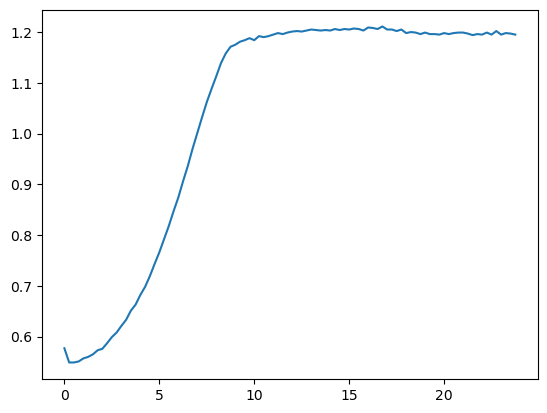

In [51]:
fig, ax = plt.subplots()

ax.plot(times, raw_data.loc['A01'])

In [54]:
#Plot entire 96 well plate: 

fig, axarr = plt.subplots(8,12, figsize = (120,80), sharey=True, sharex = True)
for jj, row in enumerate('ABCDEFGH'):
    for kk, col in enumerate(range(1,13)): 
        ax = axarr[jj,kk]
        well = row + str(col).zfill(2)
        a = times
        b = list(raw_data.loc[well,:])
        ax.plot(times, list(raw_data.loc[well,:]))
        ax.set_ylim(0,1.25)
        if col==1: 
            ax.set_ylabel(row)
        if row=='H': 
            ax.set_xlabel(str(col))




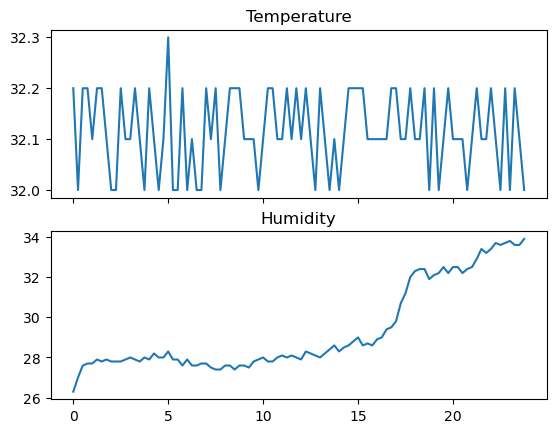

In [57]:
#Plot Temp and Humidity over Time

fig, axarr = plt.subplots(2,1, sharex=True)

plot_items = {'Temperature': temps, 
              'Humidity': humidity
              }

for jj, (title, data) in enumerate(plot_items.items()): 
    ax = axarr[jj]
    ax.plot(times, data)
    ax.set_title(title)

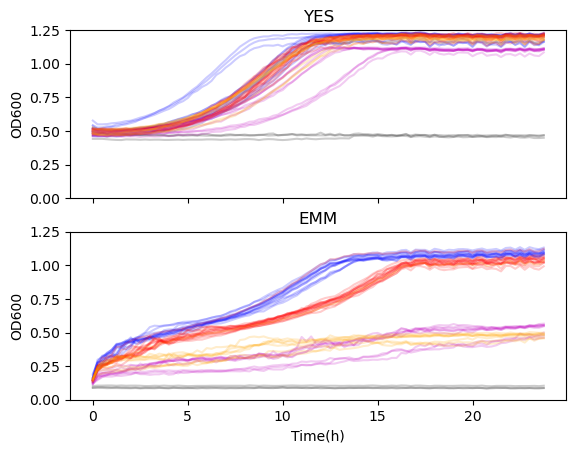

In [58]:
sample_map = pd.read_csv(base_dir + os.sep + '/' + fname_base + '_sample_map.csv')

fig, axarr = plt.subplots(2,1, sharex=True)

colormap = {'JB22': 'b', 
            'control': 'k',
            'srb10del': 'r', 
            'kgd2del': 'm',
            'tlg2del': 'orange' 
            }

for jj, media in enumerate(['YES','EMM']): 
    ax = axarr[jj]
    ax.set_title(media)
    if jj==1: 
        ax.set_xlabel('Time(h)')
    ax.set_ylabel('OD600')
    ax.set_ylim([0, 1.25])
    for strain in colormap.keys():
        sample_map_media_strain = sample_map[(sample_map['Media']==media) & (sample_map['Strain']==strain)]
        for row, col in zip(sample_map_media_strain['Row'], sample_map_media_strain['Column']):
            well = row + str(col).zfill(2)
            ax.plot(times, raw_data.loc[well,:], c = colormap[strain], alpha = 0.2, label = strain)

A02
C06
E10
A04
C08
E12


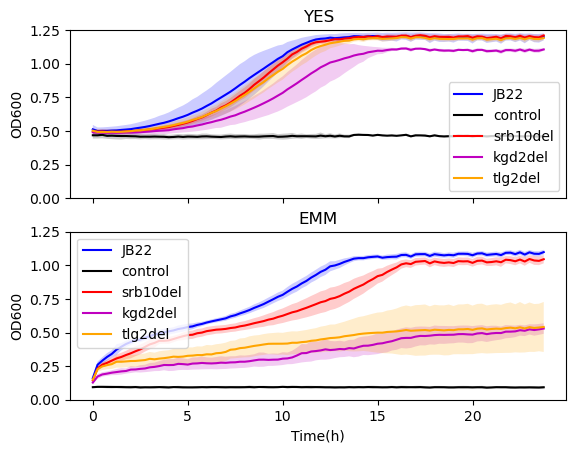

In [59]:


#Plot mean curves
fig, axarr = plt.subplots(2,1, sharex=True)

colormap = {'JB22': 'b', 
            'control': 'k',
            'srb10del': 'r', 
            'kgd2del': 'm',
            'tlg2del': 'orange' 
            }

for jj, media in enumerate(['YES','EMM']): 
    ax = axarr[jj]
    ax.set_title(media)
    if jj==1: 
        ax.set_xlabel('Time(h)')
    ax.set_ylabel('OD600')
    ax.set_ylim([0, 1.25])

    well_lists = dict(zip(colormap.keys(), [[] for jj in range(len(colormap.keys()))]))  #List to store well names for various conditions

    for strain in colormap.keys():
        sample_map_media_strain = sample_map[(sample_map['Media']==media) & (sample_map['Strain']==strain)]
        for row, col in zip(sample_map_media_strain['Row'], sample_map_media_strain['Column']):
            well = row + str(col).zfill(2)
            if strain=='control':
                print(well)
            well_lists[strain].append(well)      
            
    
        mean = raw_data.loc[well_lists[strain],:].mean()
        std = raw_data.loc[well_lists[strain],:].std()
        ax.plot(times, mean, c = colormap[strain], label = strain)
        ax.fill_between(times, mean - std, mean + std, facecolor=colormap[strain], alpha=0.2)
    ax.legend()

    
